In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
# !wget https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv

In [65]:
df = pd.read_csv("CreditScoring.csv")

In [66]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [67]:
#!pip install sweetviz

In [68]:
status_enc = {
    1 : 'ok',
    2 : 'default',
    3 : 'unknown',
}
home_enc = {
    0 : 'unknown',
    1 : 'rent',
    2 : 'owner',
    3 : 'private',
    4 : 'ignore',
    5 : 'parents',
    6 : 'other',
}
marital_enc = {
    0 : 'unknown',
    1 : 'single',
    2 : 'married',
    3 : 'widow',
    4 : 'separated',
    5 : 'divorced',
}
records_enc = {
    0 : 'unknown',
    1 : 'no',
    2 : 'yes',
}
job_enc = {
    0: 'unknown',
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
}

In [69]:
df['Status'] = df['Status'].map(status_enc)
df['Home'] = df['Home'].map(home_enc)
df['Marital'] = df['Marital'].map(marital_enc)
df['Records'] = df['Records'].map(records_enc)
df['Job'] = df['Job'].map(job_enc)

In [70]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [71]:
df[df.isna().any(axis=1)]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
3309,NaN,10,private,60,25,single,no,fixed,35,148,3000,0,1500,1888


In [72]:
df = df.drop(df[df.isna().any(axis=1)].index)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [73]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,763488.0,1060578.0,404473.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8704595.0,10218704.0,6344963.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [74]:
for col in ['Income', 'Assets', 'Debt']:
    df[col] = df[col].replace(to_replace=99999999.0, value=np.nan)

In [75]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4454.0,4454.0,4454.0,4454.0,4420.0,4407.0,4436.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,131.0,5404.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11574.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [76]:
df['Status'].value_counts()

ok         3200
default    1254
Name: Status, dtype: int64

In [77]:
# import sweetviz as sv

In [78]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['Status'])
df['Status_enc'] = enc.transform(df['Status'])
print(df[['Status', 'Status_enc']][:5])

    Status  Status_enc
0       ok           1
1       ok           1
2  default           0
3       ok           1
4       ok           1


In [79]:
report = sv.analyze(df, target_feat='Status_enc')

                                             |      | [  0%]   00:00 -> (? left)


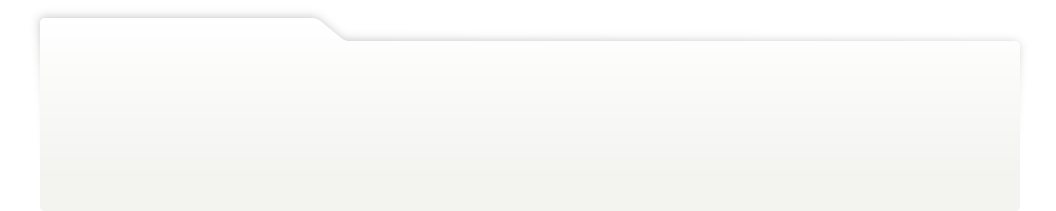
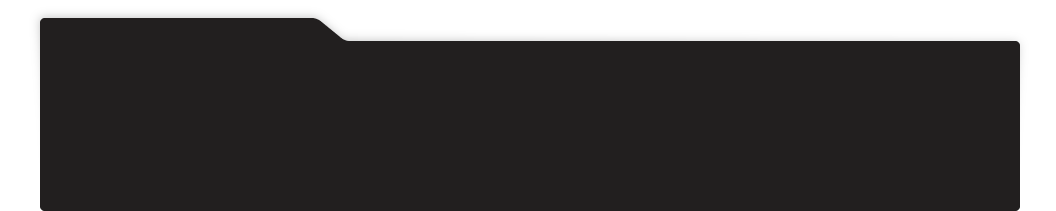
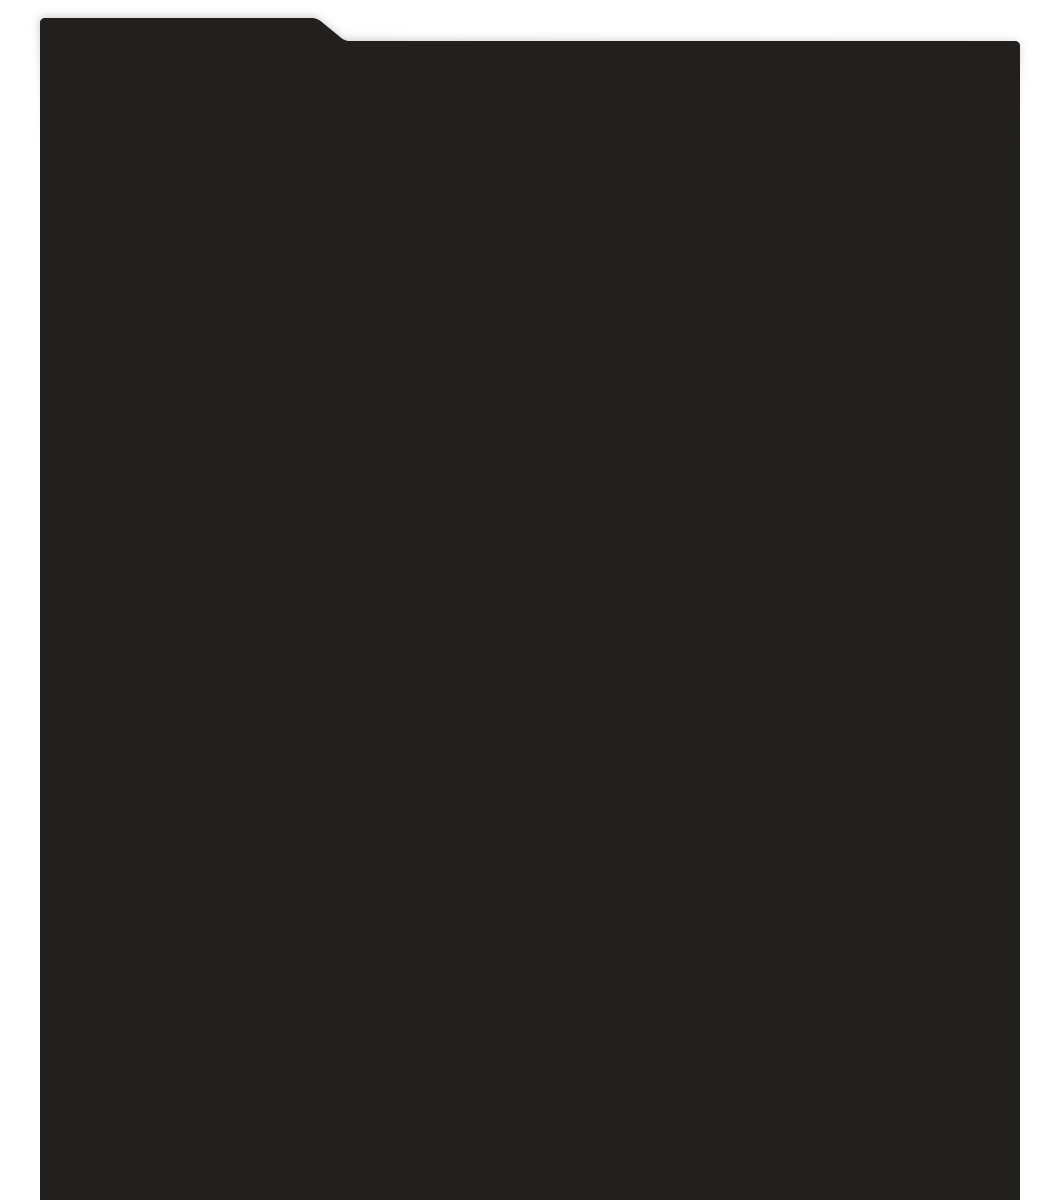
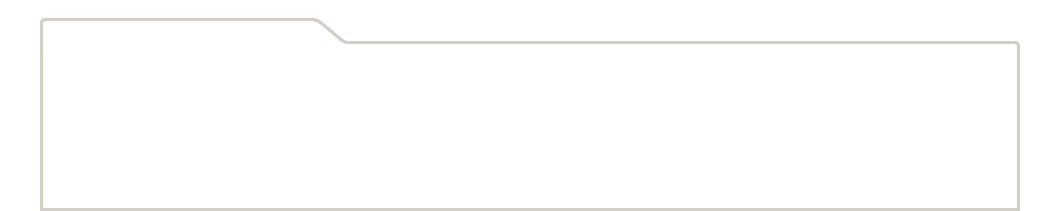
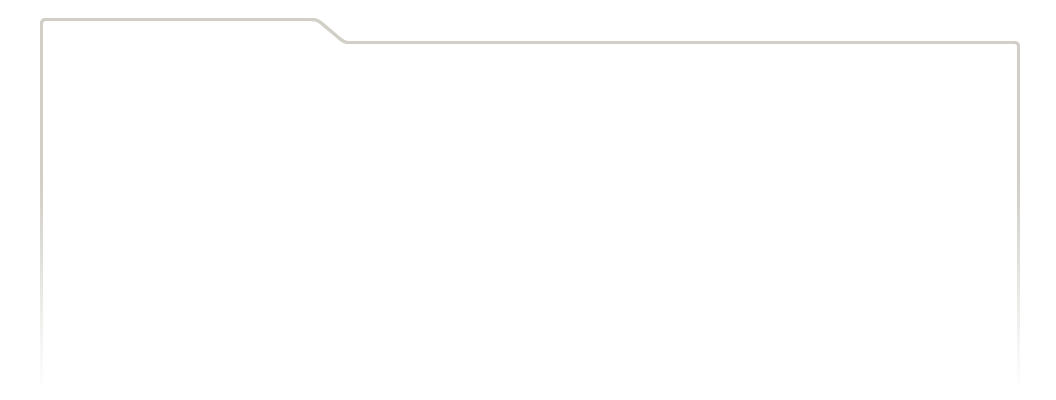
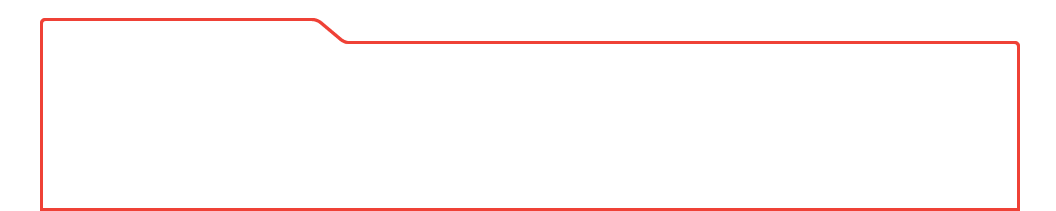
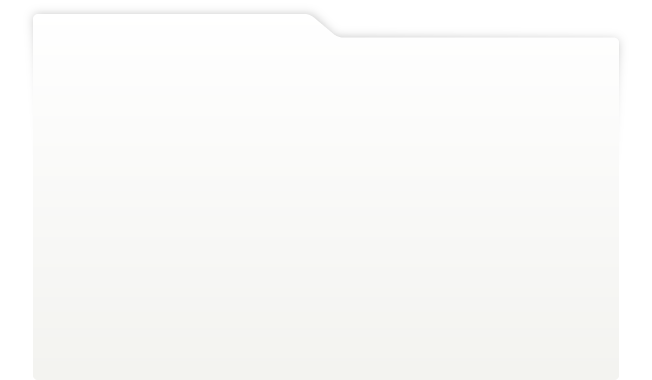
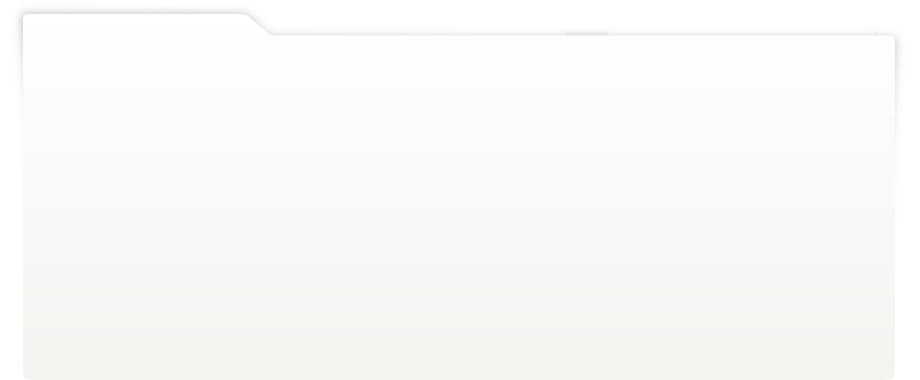
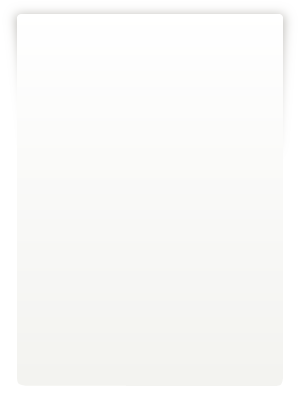
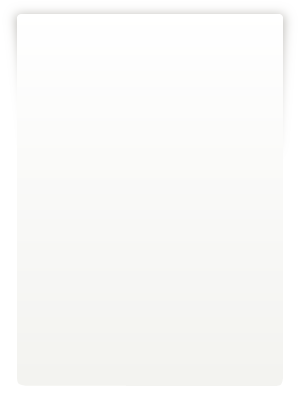
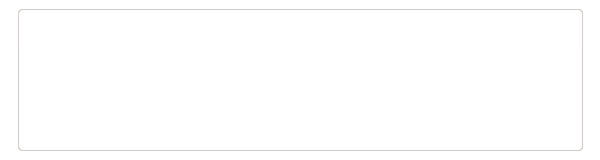
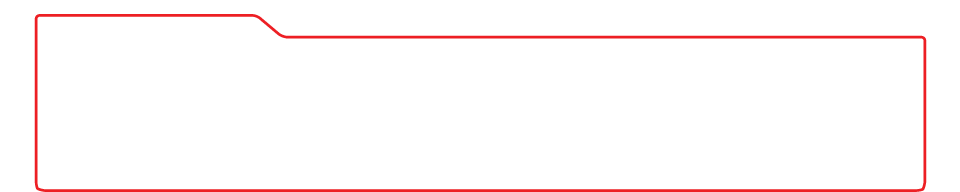
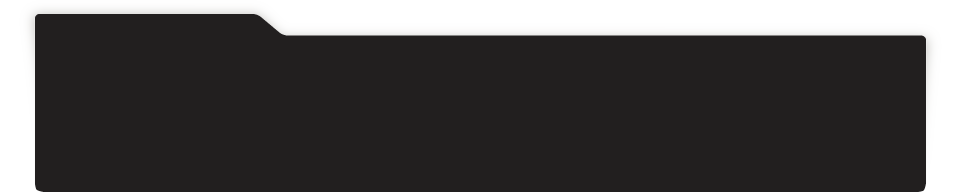
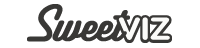
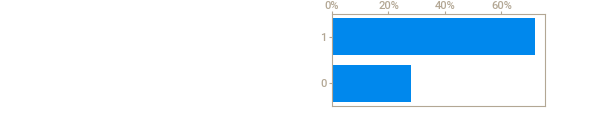
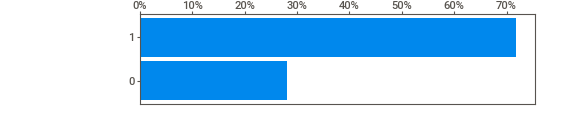
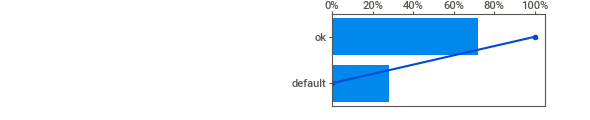
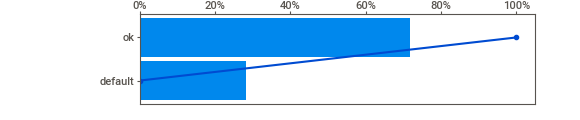
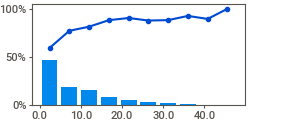
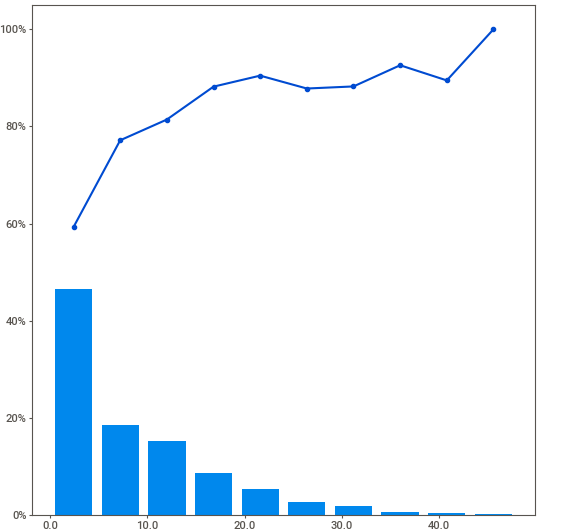
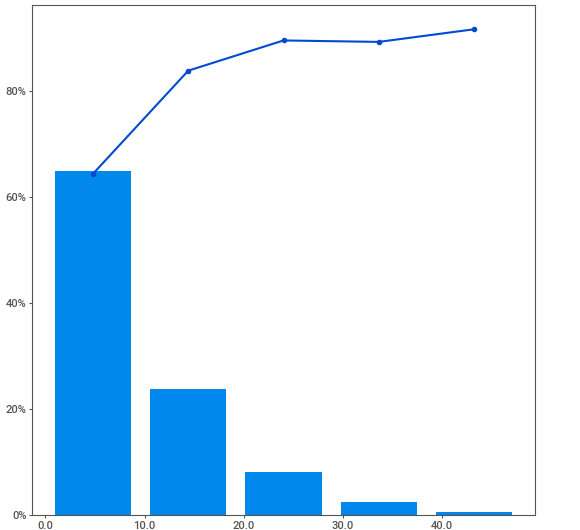
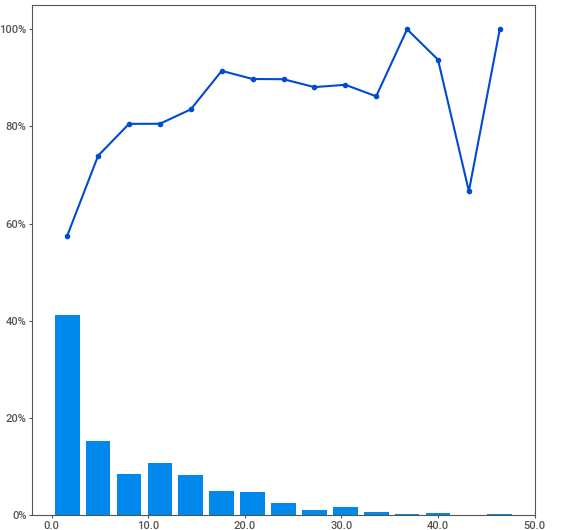
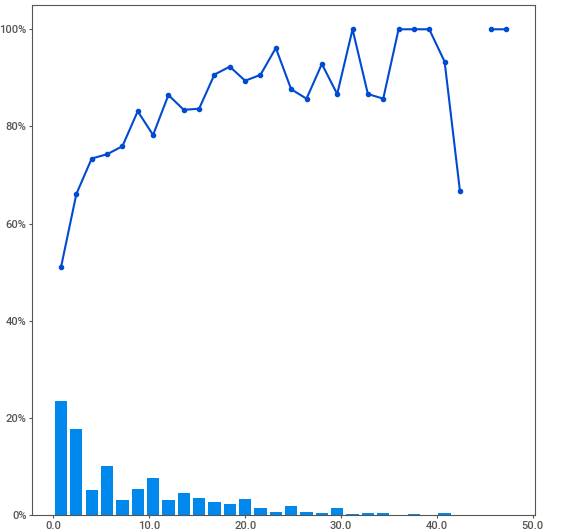
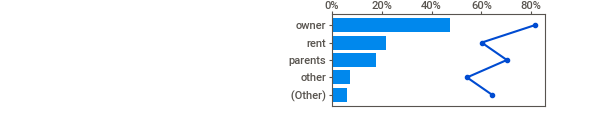
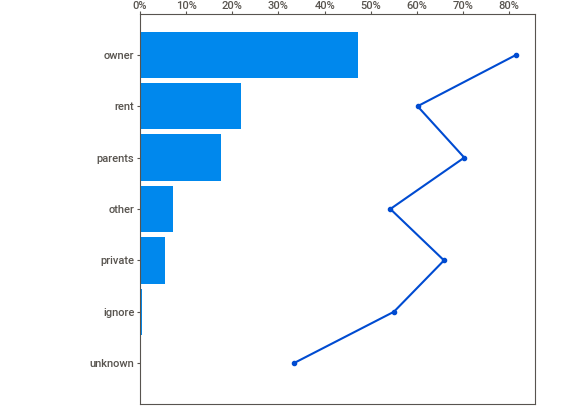
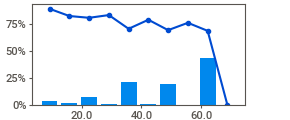
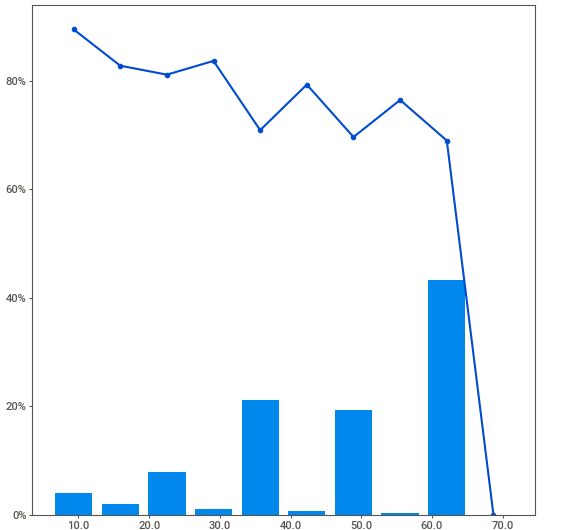
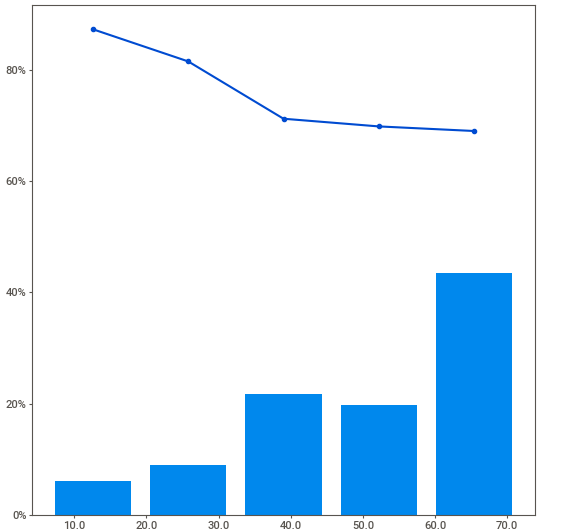
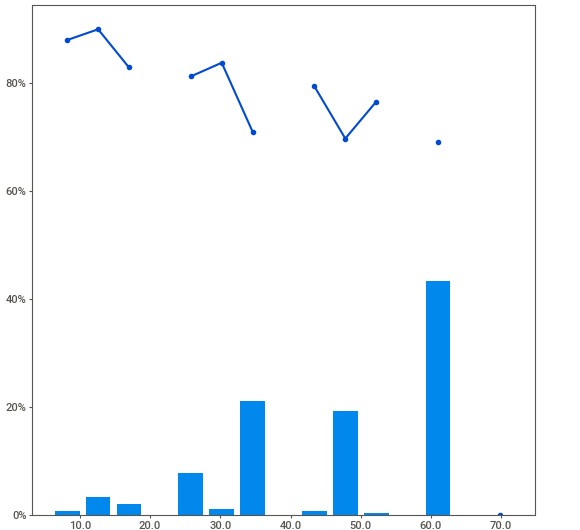
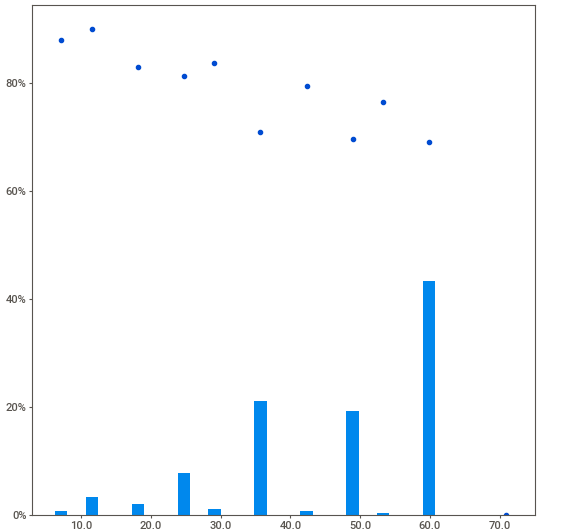
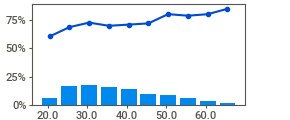
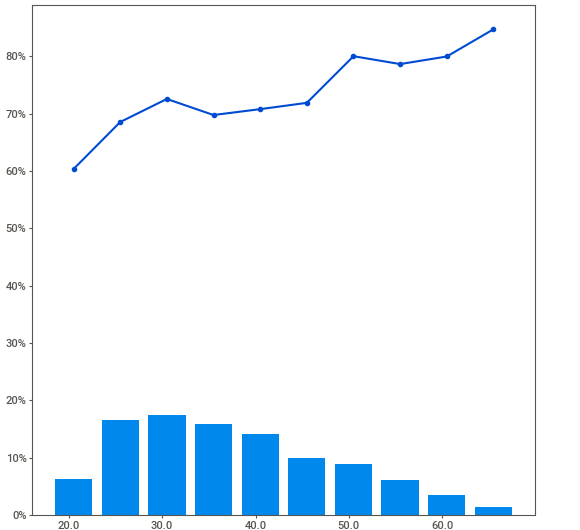
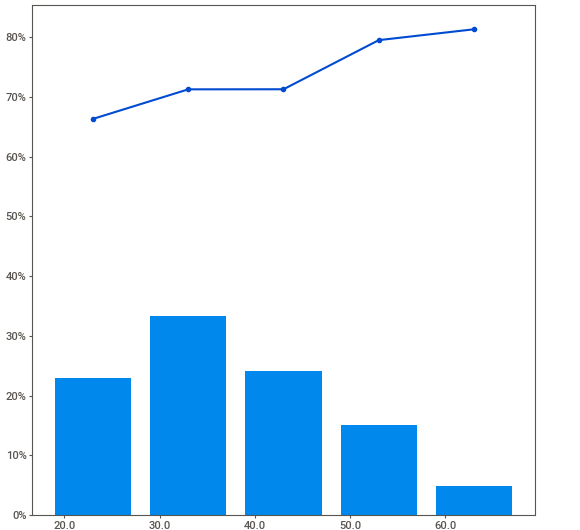
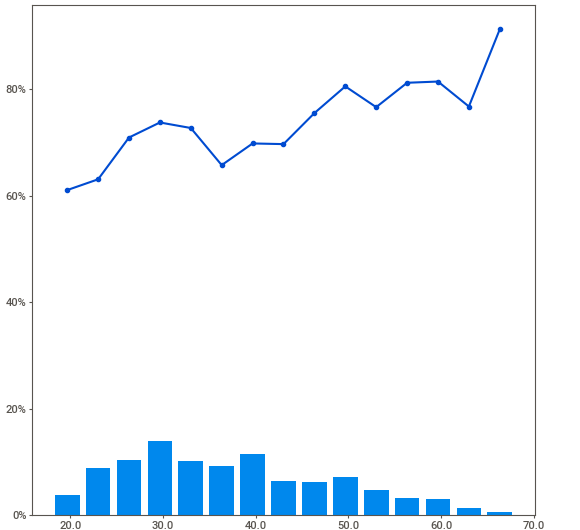
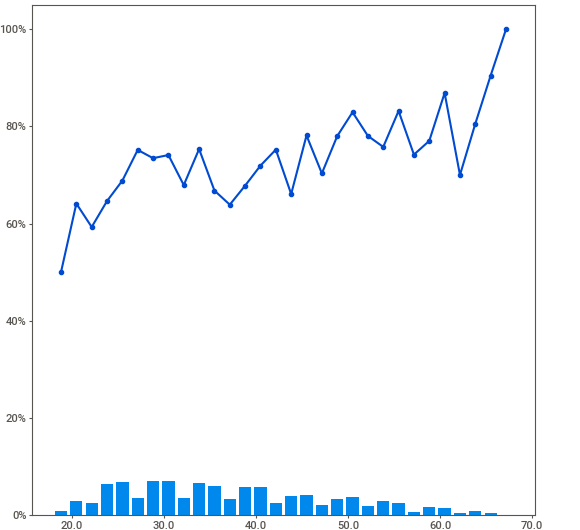
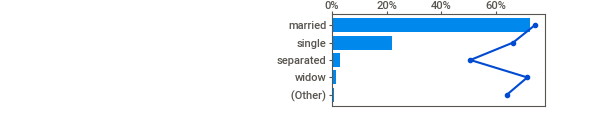
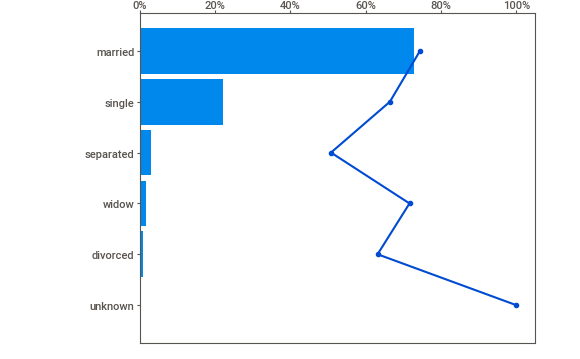
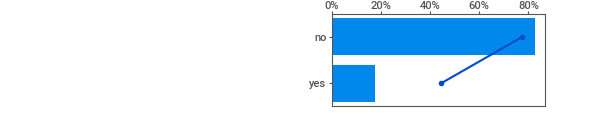
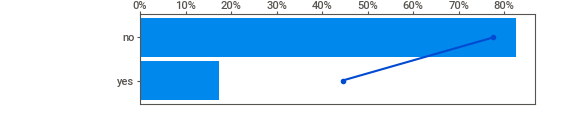
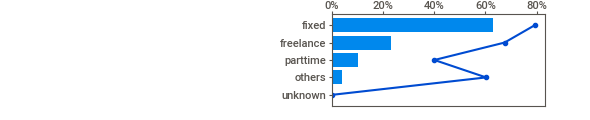
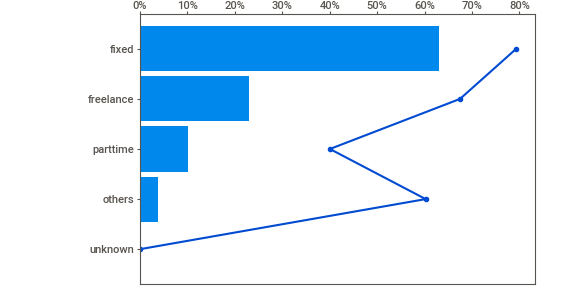
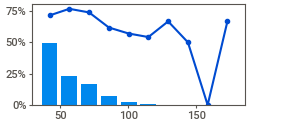
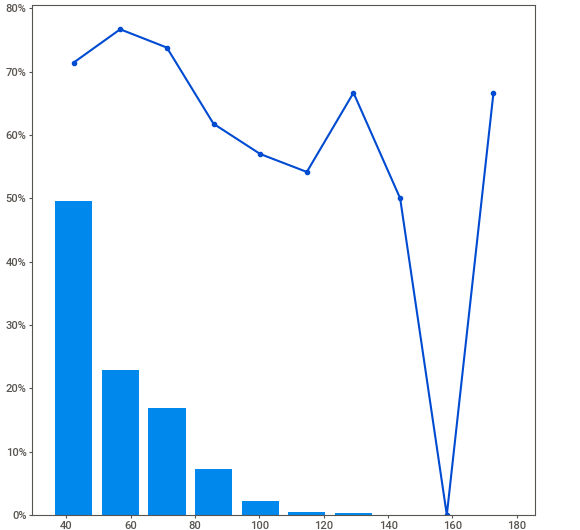
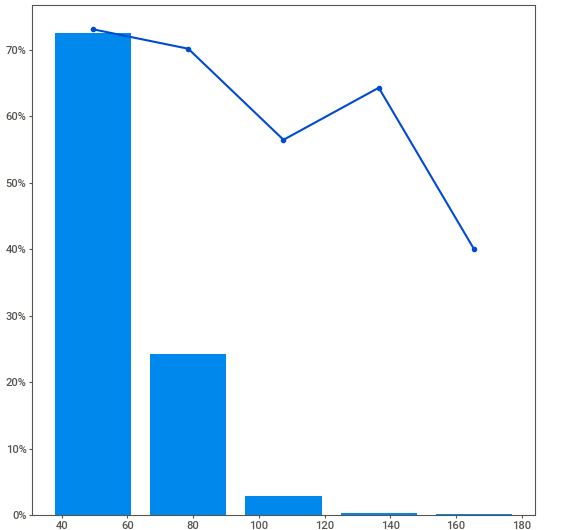
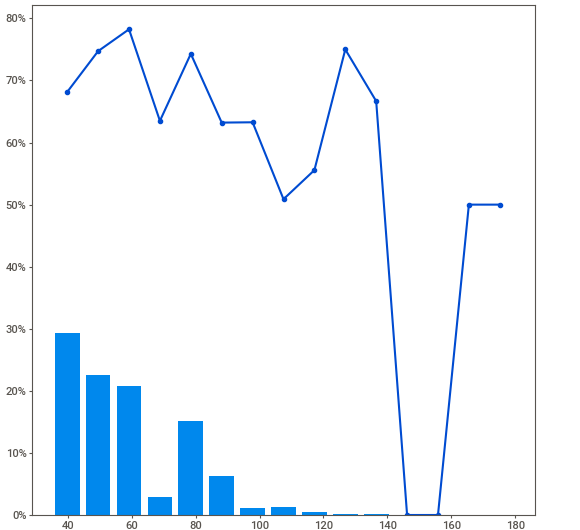
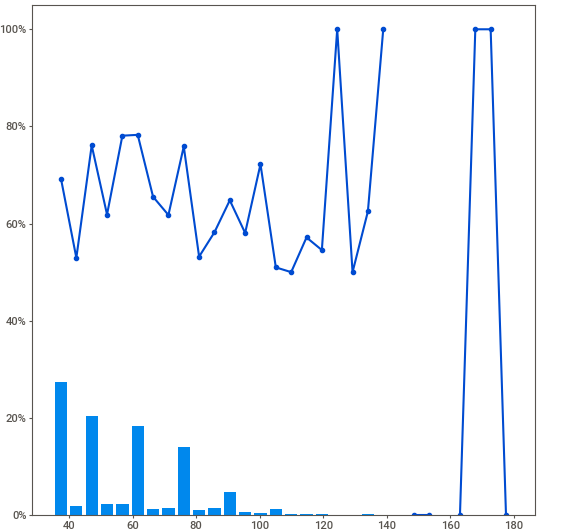
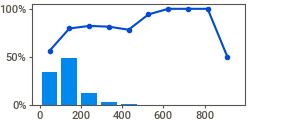
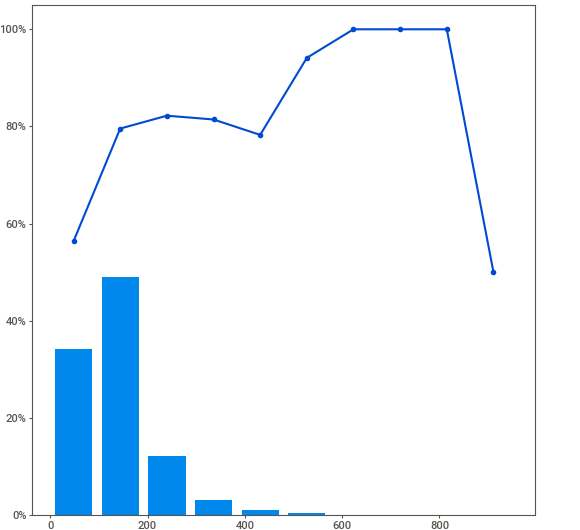
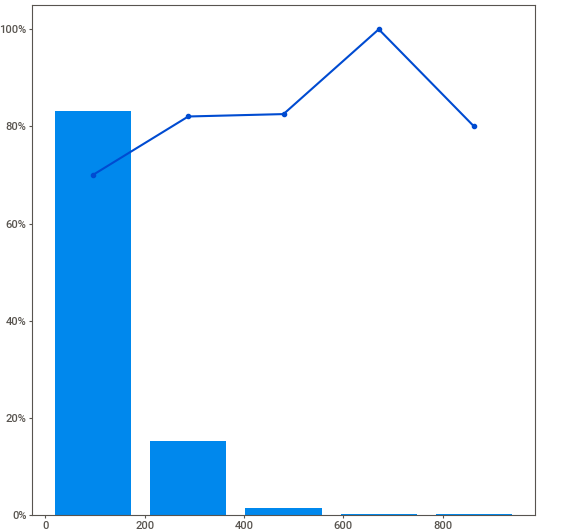
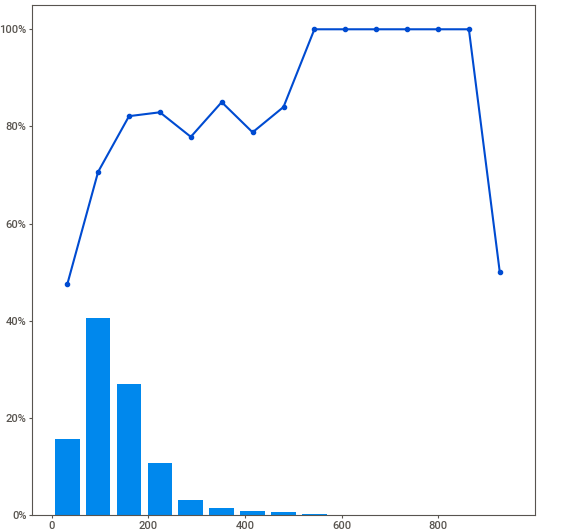
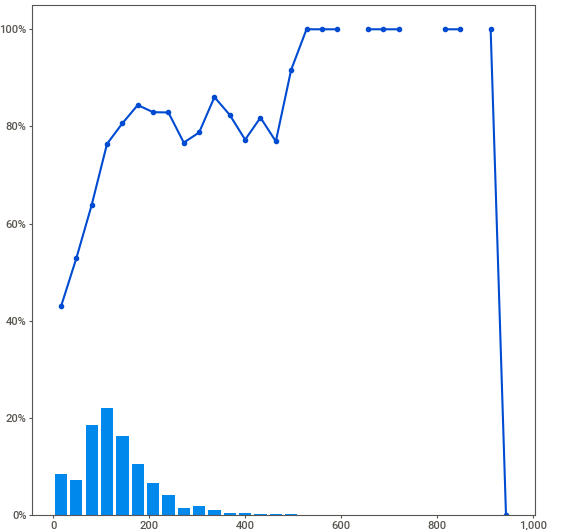
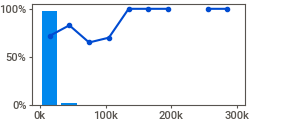
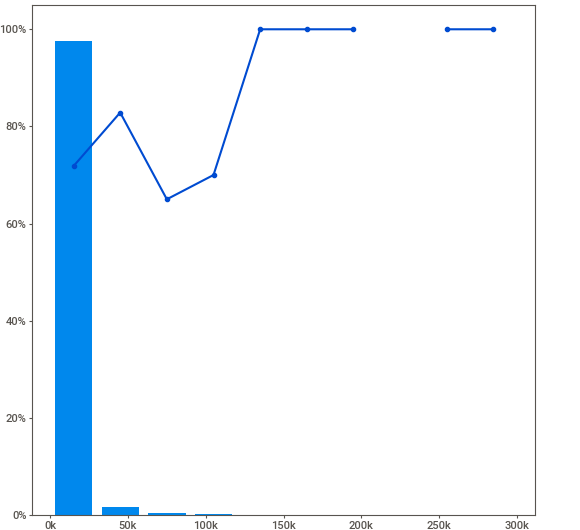
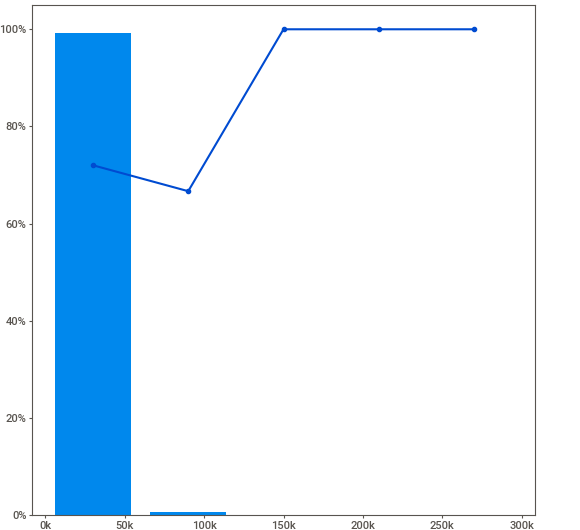
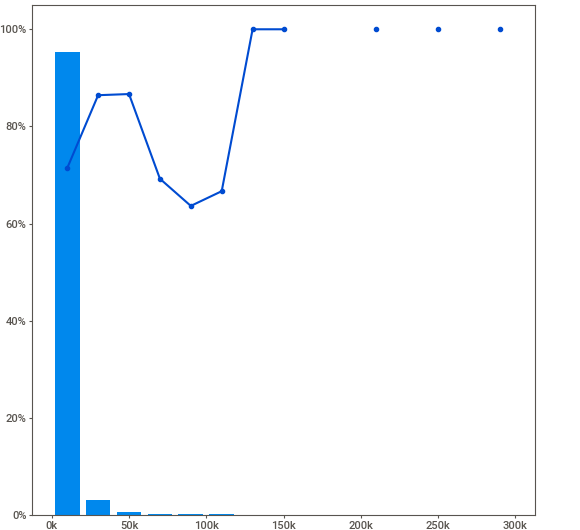
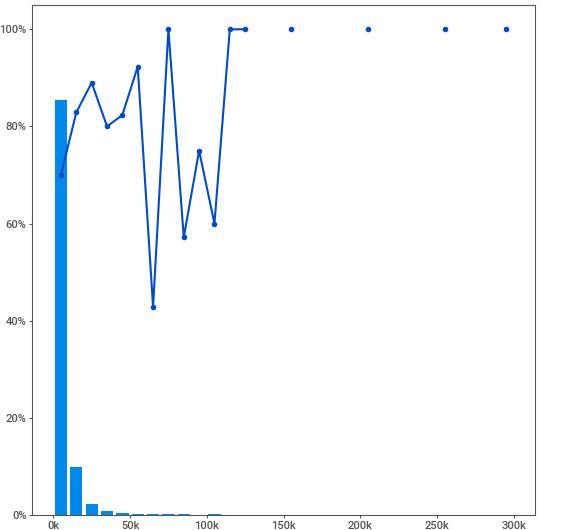
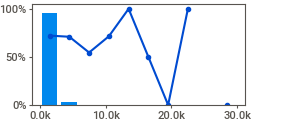
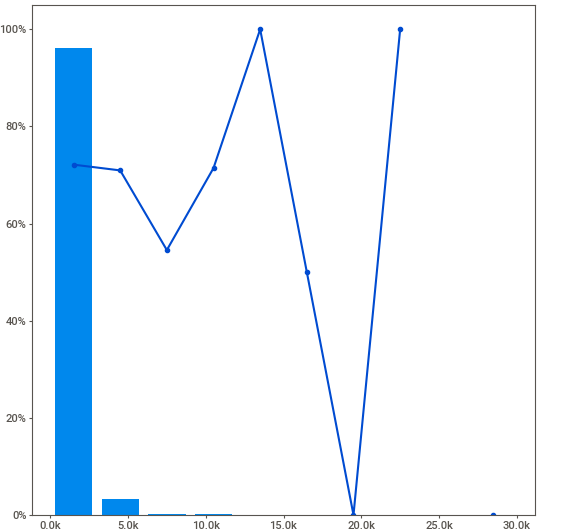
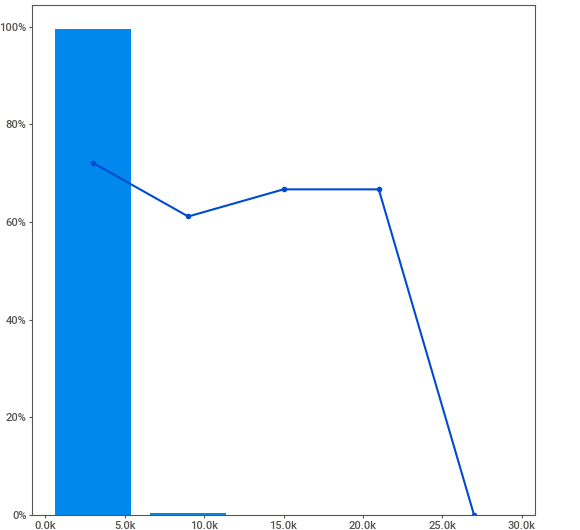
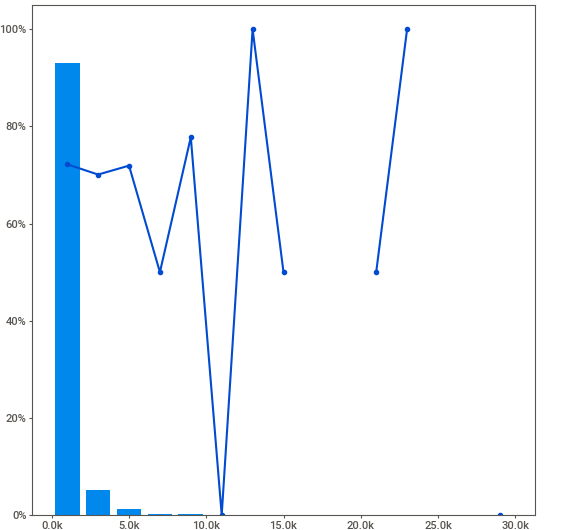
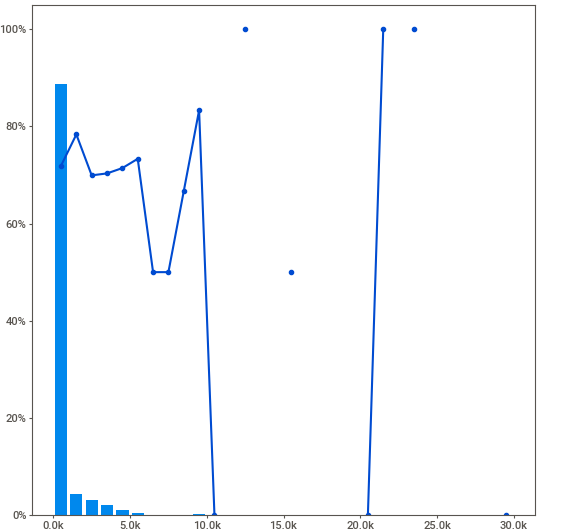
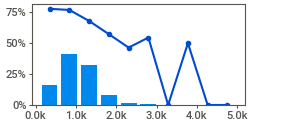
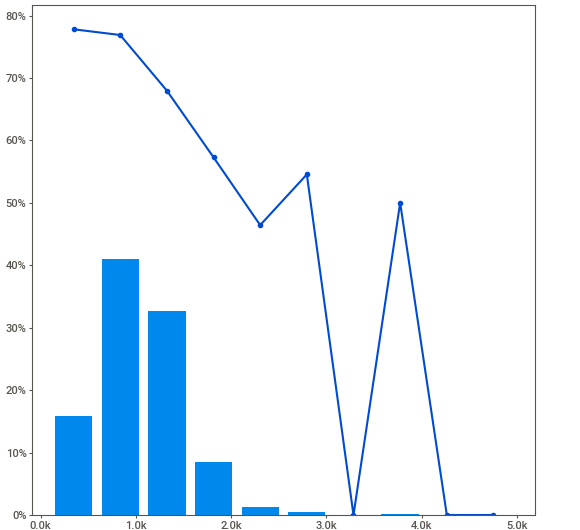
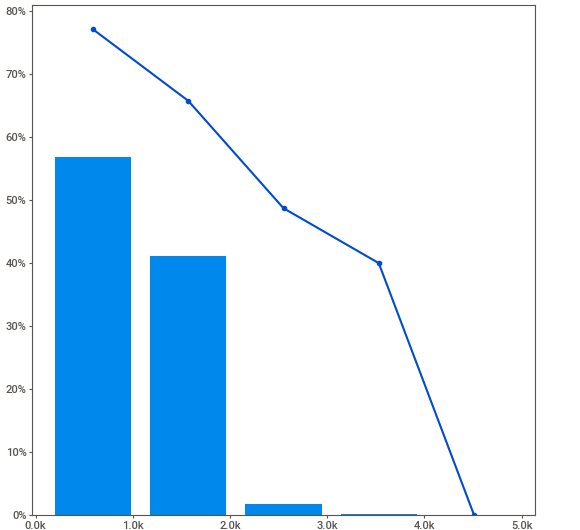
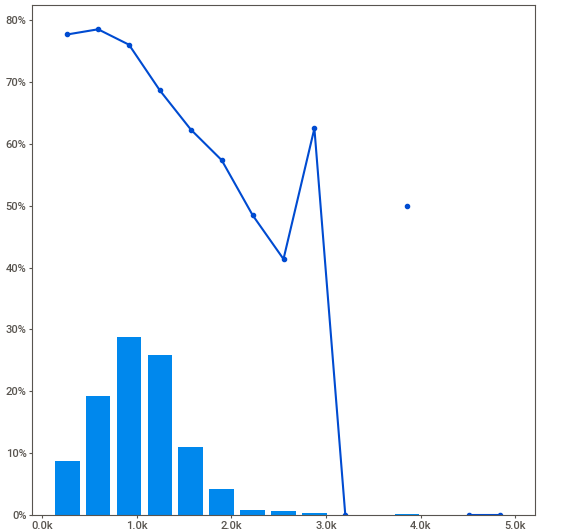
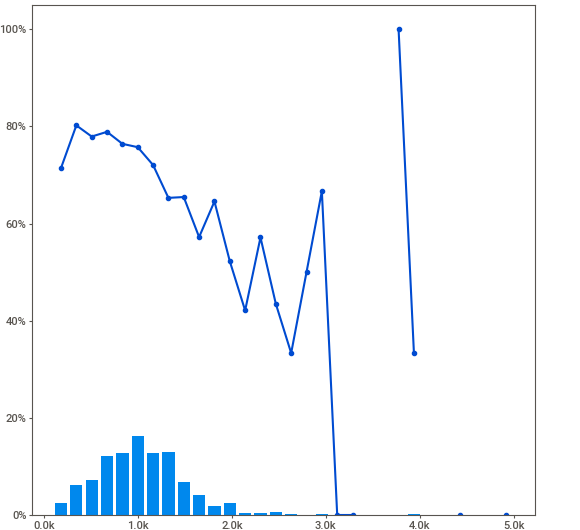
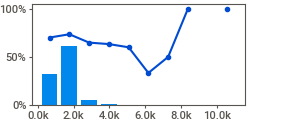
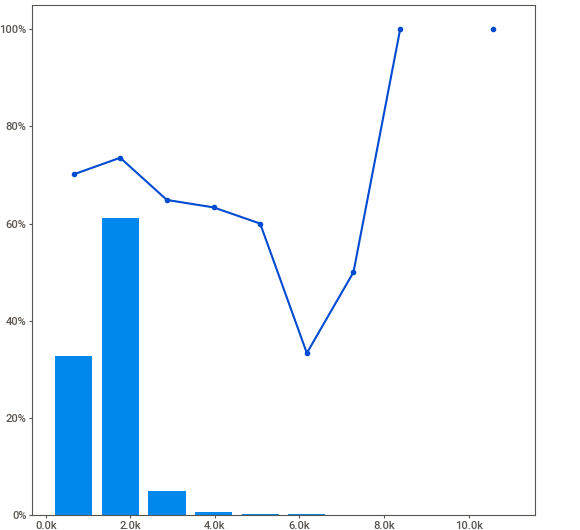
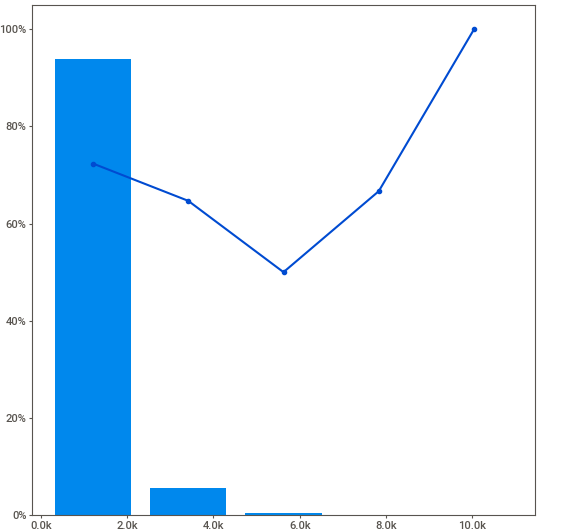
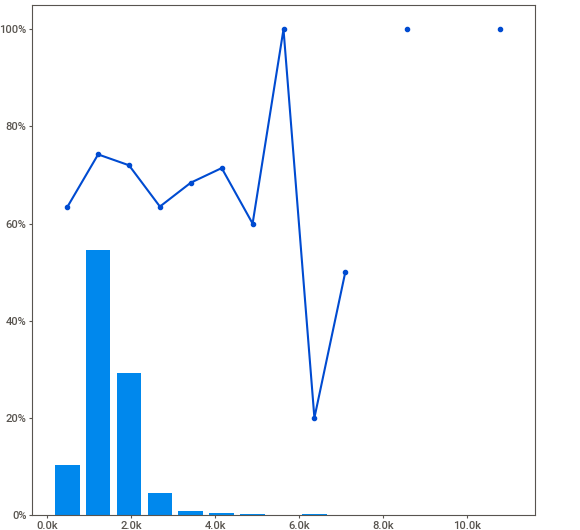
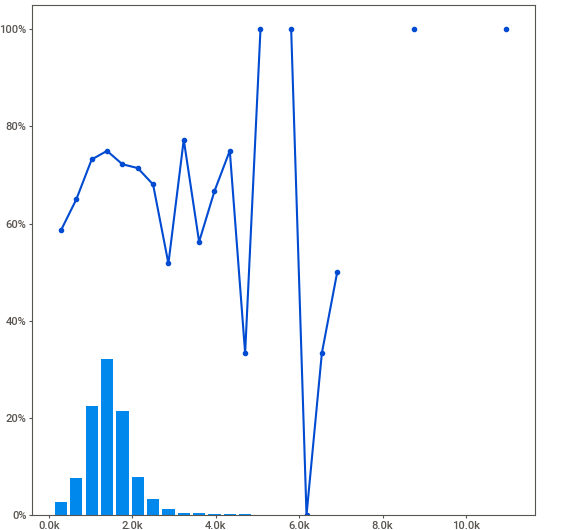
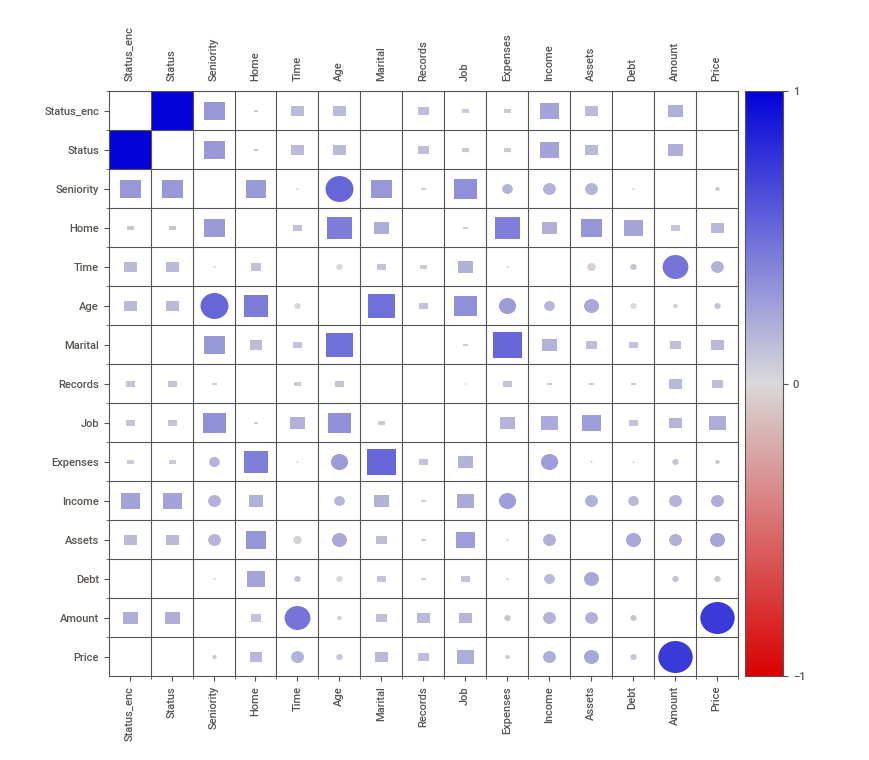
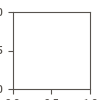

In [80]:
report.show_notebook()

In [81]:
X = df.drop('Status_enc', axis=1, inplace=True)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df.drop('Status', axis=1)
y = df['Status']
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [84]:
X_train

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
734,30,owner,18,57,married,yes,freelance,75,290.0,NaN,0.0,350,450
981,6,owner,18,33,single,no,fixed,35,163.0,6000.0,0.0,1200,2022
452,2,rent,36,21,single,no,fixed,45,100.0,0.0,0.0,700,825
4120,10,owner,48,36,married,yes,freelance,75,214.0,10000.0,0.0,1143,1143
4218,10,private,36,47,married,yes,fixed,45,60.0,5000.0,0.0,250,1343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0,rent,36,24,single,no,parttime,44,85.0,0.0,0.0,375,575
4061,5,rent,54,27,married,no,fixed,47,118.0,0.0,0.0,1500,1600
1346,3,owner,48,32,married,no,freelance,75,65.0,10500.0,1500.0,1500,2155
3455,1,private,60,28,married,no,parttime,60,174.0,6000.0,720.0,1650,1930


In [85]:
numeric_columns = X_train.describe().columns
X_train_num = X_train[numeric_columns]

In [86]:
X_train_num

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
734,30,18,57,75,290.0,NaN,0.0,350,450
981,6,18,33,35,163.0,6000.0,0.0,1200,2022
452,2,36,21,45,100.0,0.0,0.0,700,825
4120,10,48,36,75,214.0,10000.0,0.0,1143,1143
4218,10,36,47,45,60.0,5000.0,0.0,250,1343
...,...,...,...,...,...,...,...,...,...
1593,0,36,24,44,85.0,0.0,0.0,375,575
4061,5,54,27,47,118.0,0.0,0.0,1500,1600
1346,3,48,32,75,65.0,10500.0,1500.0,1500,2155
3455,1,60,28,60,174.0,6000.0,720.0,1650,1930


In [88]:
X_train_num = X_train_num.fillna(0)

In [89]:
X_train_num

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
0,30,18,57,75,290.0,0.0,0.0,350,450
1,6,18,33,35,163.0,6000.0,0.0,1200,2022
2,2,36,21,45,100.0,0.0,0.0,700,825
3,10,48,36,75,214.0,10000.0,0.0,1143,1143
4,10,36,47,45,60.0,5000.0,0.0,250,1343
...,...,...,...,...,...,...,...,...,...
3558,0,36,24,44,85.0,0.0,0.0,375,575
3559,5,54,27,47,118.0,0.0,0.0,1500,1600
3560,3,48,32,75,65.0,10500.0,1500.0,1500,2155
3561,1,60,28,60,174.0,6000.0,720.0,1650,1930


In [90]:
categories = [
    list(home_enc.values()),
    list(marital_enc.values()),
    list(records_enc.values()),
    list(job_enc.values())
]

In [91]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False, categories=categories)

In [92]:
X_train_categorical = X_train[['Home', 'Marital', 'Records', 'Job']]
X_train_categorical = onehot_encoder.fit_transform(X_train_categorical)

In [93]:
X_train_categorical = pd.DataFrame(X_train_categorical, columns=onehot_encoder.get_feature_names_out())
X_train_categorical

,Home_unknown,Home_rent,Home_owner,Home_private,Home_ignore,Home_parents,Home_other,Marital_unknown,Marital_single,Marital_married,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3559,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3560,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
X_train_fe = pd.concat([X_train_num, X_train_categorical], axis=1)
X_train_fe

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Home_unknown,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,30,18,57,75,290.0,0.0,0.0,350,450,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6,18,33,35,163.0,6000.0,0.0,1200,2022,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,36,21,45,100.0,0.0,0.0,700,825,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10,48,36,75,214.0,10000.0,0.0,1143,1143,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,10,36,47,45,60.0,5000.0,0.0,250,1343,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0,36,24,44,85.0,0.0,0.0,375,575,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3559,5,54,27,47,118.0,0.0,0.0,1500,1600,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3560,3,48,32,75,65.0,10500.0,1500.0,1500,2155,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3561,1,60,28,60,174.0,6000.0,720.0,1650,1930,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt = DecisionTreeClassifier(max_depth=2)

In [99]:
y_train[y_train.isna()]

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
y_train = y_train.fillna(0)

In [103]:
dt.fit(X_train_fe, y_train)

TypeError: '<' not supported between instances of 'str' and 'int'